In [1]:
!pip install tensorflow pillow numpy matplotlib scikit-learn



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

In [3]:
mask_path = "C:/Users/harsh/Downloads/archive (2)/data/without_mask"
nomask_path = "C:/Users/harsh/Downloads/archive (2)/data/with_mask"

In [4]:
def load_images(folder, label):
    X, y = [], []
    for file in os.listdir(folder):
        path = os.path.join(folder, file)
        
        if not path.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue
        
        img = Image.open(path).convert("RGB")
        img = img.resize((128, 128))
        X.append(np.array(img))
        y.append(label)
    
    return X, y


mask_images, mask_labels = load_images(mask_path, 1)
nomask_images, nomask_labels = load_images(nomask_path, 0)

X = np.array(mask_images + nomask_images)
y = np.array(mask_labels + nomask_labels)

print("Total images:", len(y))
print("Mask:", len(mask_labels))
print("No Mask:", len(nomask_labels))


C:\Users\harsh\anaconda3\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Total images: 7553
Mask: 3828
No Mask: 3725


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

X_train = X_train / 255.0
X_test = X_test / 255.0

print("Train:", X_train.shape)
print("Test:", X_test.shape)


Train: (6042, 128, 128, 3)
Test: (1511, 128, 128, 3)


In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')  # Binary output
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\Users\harsh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,549,953 (24.99 MB)

 Trainable params: 6,549,505 (24.98 MB)

 Non-trainable params: 448 (1.75 KB)

In [7]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=4, restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop]
)


Epoch 1/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 71s 413ms/step - accuracy: 0.8192 - loss: 1.1108 - val_accuracy: 0.6369 - val_loss: 1.1273
Epoch 2/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 61s 400ms/step - accuracy: 0.8678 - loss: 0.5073 - val_accuracy: 0.5674 - val_loss: 1.9185
Epoch 3/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 60s 396ms/step - accuracy: 0.8922 - loss: 0.3310 - val_accuracy: 0.7849 - val_loss: 0.5178
Epoch 4/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 60s 397ms/step - accuracy: 0.9187 - loss: 0.2328 - val_accuracy: 0.8619 - val_loss: 0.5090
Epoch 5/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 61s 399ms/step - accuracy: 0.9392 - loss: 0.1688 - val_accuracy: 0.8834 - val_loss: 0.2849
Epoch 6/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 63s 412ms/step - accuracy: 0.9483 - loss: 0.1453 - val_accuracy: 0.9338 - val_loss: 0.1576
Epoch 7/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 59s 385ms/step - accuracy: 0.9439 - loss: 0.1572 - val_accuracy: 0.9495 - val_loss: 0.1424
Epoch 8/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 59s 385ms/step - accuracy: 0.9597 - loss: 0

In [8]:
loss, acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", acc)


48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.9530 - loss: 0.1358
Test Accuracy: 0.9530112743377686


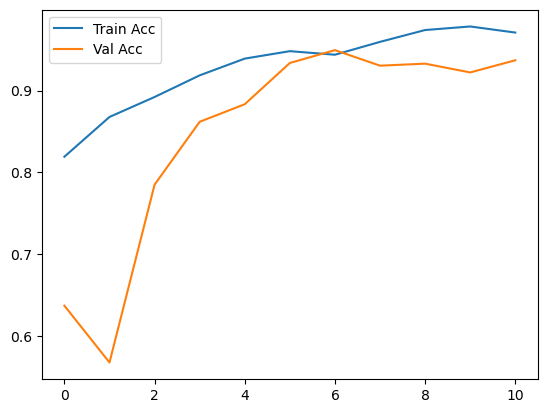

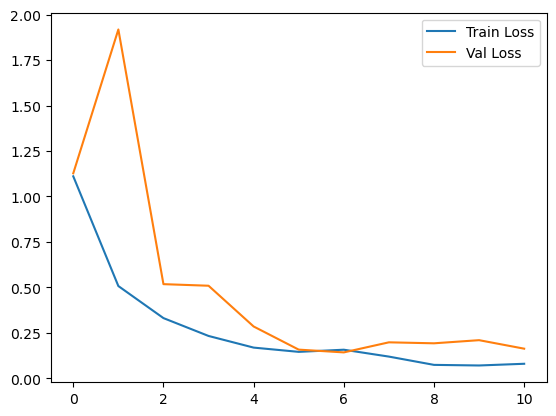

In [9]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


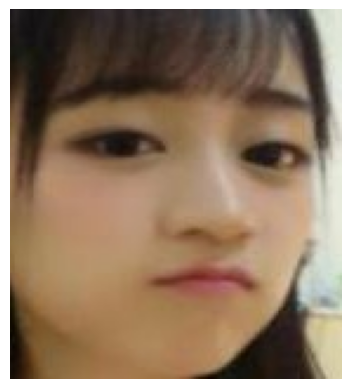

No Mask Detected


In [17]:
def predict_mask(path):
    img = cv2.imread(path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(img_rgb, (128, 128)) / 255.0
    reshaped = np.expand_dims(resized, axis=0)

    pred = model.predict(reshaped)[0][0]

    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()

    if pred > 0.5:
        print("No Mask Detected")
    else:
        print("Mask Detected")

# Example
predict_mask("C:/Users/harsh/Downloads/archive (2)/data/without_mask/without_mask_968.jpg")   
